# Regularization : underfitting and overfiting

## Exercise 1: Load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Exercise 2: Normalizing data

In [4]:
import numpy as np

In [5]:
def normalize_data(data): 
  results = np.zeros(data.shape)
  mean_value = data.mean(axis = 0)
  std_value = data.std(axis = 0)

  for i in range(len(data)): 
    row = data[i]
    for j in range(len(row)): 
      feature = row[j]
      results[i][j] = (feature - mean_value[j]) / (std_value[j] if std_value[j] != 0 else 1)
    
  return results


In [6]:
x_train = normalize_data(train_data)
x_test = normalize_data(test_data)

y_train = np.asarray(train_targets).astype('float32')
y_test = np.asarray(test_targets).astype('float32')

## Exercise 3: Model definition

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
def build_model(units = 64): 
  model = Sequential()
  
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(1, activation = None))
  
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

  return model

## Exercise 4: Model Validation

In [9]:
import time

In [10]:
def cross_validation(features, targets, k = 4, epochs = 100, units_per_hidden_layers = None, verbose = 1): 
  num_val_samples = len(features) // k
  all_scores, mae_history = [], []

  for i in range(k): 
    print(f'Processing fold #{i + 1}/{k}')
    _start = time.time()

    val_data = features[i * num_val_samples:(i+1) * num_val_samples]
    val_targets = targets[i * num_val_samples:(i+1) * num_val_samples]
    partial_train_data = np.concatenate([
                                         features[:i * num_val_samples], 
                                         features[(i+1) * num_val_samples:]
                                         ], axis = 0)
    partial_train_targets = np.concatenate([
                                         targets[:i * num_val_samples], 
                                         targets[(i+1) * num_val_samples:]
                                         ], axis = 0)
    
    if units_per_hidden_layers is not None:
      units = units_per_hidden_layers

    else: 
      units = 64

    model = build_model(units)


    model_hist = model.fit(
        partial_train_data, 
        partial_train_targets, 
        epochs = epochs, 
        validation_data = (val_data, val_targets), 
        batch_size = 1, 
        verbose = verbose
    )

    mae_hist = model_hist.history['val_mae']
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)
    mae_history.append(np.array(mae_hist))

    _end = time.time()
    dt = _end - _start

    if verbose != 0:
      if i < k - 1:
        continue
    else:
      print(f'Time: {round(dt)}s - MAE value: {round(val_mae, 4)}')

  return np.array(all_scores), np.array(mae_history)


In [11]:
all_scores, mae_history = cross_validation(x_train, y_train)

Processing fold #1/4
Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 237.5379 - mae: 12.0935 - val_loss: 32.6296 - val_mae: 3.8134
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 27.7024 - mae: 3.6347 - val_loss: 20.4608 - val_mae: 3.1804
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 20.6718 - mae: 3.1171 - val_loss: 15.3071 - val_mae: 2.5532
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 17.9003 - mae: 2.8538 - val_loss: 13.3513 - val_mae: 2.3047
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 15.8099 - mae: 2.6698 - val_loss: 11.9929 - val_mae: 2.3859
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 15.0023 - mae: 2.5819 - val_loss: 12.2120 - val_mae: 2.5744
Epoch 7/100
303/303 [==============================] - 1s 2ms/step - loss: 14.1338 - mae: 2.5692 - val_loss: 10.9010 - val_mae: 2.2440
Epoch 8/100
303/303 [===========

Epoch 62/100
303/303 [==============================] - 1s 3ms/step - loss: 6.2338 - mae: 1.6711 - val_loss: 7.8114 - val_mae: 1.8602
Epoch 63/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0434 - mae: 1.6202 - val_loss: 7.9828 - val_mae: 2.0499
Epoch 64/100
303/303 [==============================] - 1s 3ms/step - loss: 5.9435 - mae: 1.6028 - val_loss: 11.3100 - val_mae: 2.4843
Epoch 65/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0880 - mae: 1.6327 - val_loss: 8.3242 - val_mae: 2.0614
Epoch 66/100
303/303 [==============================] - 1s 3ms/step - loss: 5.9301 - mae: 1.5882 - val_loss: 8.5334 - val_mae: 1.9196
Epoch 67/100
303/303 [==============================] - 1s 3ms/step - loss: 6.2899 - mae: 1.5689 - val_loss: 7.9860 - val_mae: 2.1787
Epoch 68/100
303/303 [==============================] - 1s 3ms/step - loss: 5.9635 - mae: 1.6209 - val_loss: 7.1323 - val_mae: 1.8232
Epoch 69/100
303/303 [==============================] - 1s 3m

Epoch 23/100
303/303 [==============================] - 1s 2ms/step - loss: 9.2903 - mae: 2.0803 - val_loss: 13.0898 - val_mae: 2.8278
Epoch 24/100
303/303 [==============================] - 1s 3ms/step - loss: 8.3479 - mae: 2.0156 - val_loss: 11.0610 - val_mae: 2.6154
Epoch 25/100
303/303 [==============================] - 1s 5ms/step - loss: 8.8186 - mae: 2.0303 - val_loss: 11.7684 - val_mae: 2.6561
Epoch 26/100
303/303 [==============================] - 1s 2ms/step - loss: 8.6408 - mae: 1.9489 - val_loss: 11.2646 - val_mae: 2.5609
Epoch 27/100
303/303 [==============================] - 1s 2ms/step - loss: 8.7338 - mae: 1.9898 - val_loss: 10.9254 - val_mae: 2.5328
Epoch 28/100
303/303 [==============================] - 1s 3ms/step - loss: 8.4675 - mae: 2.0353 - val_loss: 10.3026 - val_mae: 2.4873
Epoch 29/100
303/303 [==============================] - 1s 3ms/step - loss: 8.4024 - mae: 1.9678 - val_loss: 11.9412 - val_mae: 2.7320
Epoch 30/100
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 4.7709 - mae: 1.4662 - val_loss: 11.2037 - val_mae: 2.6066
Epoch 84/100
303/303 [==============================] - 1s 2ms/step - loss: 4.7503 - mae: 1.4452 - val_loss: 10.3052 - val_mae: 2.4256
Epoch 85/100
303/303 [==============================] - 1s 2ms/step - loss: 4.7854 - mae: 1.4665 - val_loss: 9.7633 - val_mae: 2.4115
Epoch 86/100
303/303 [==============================] - 1s 2ms/step - loss: 4.5677 - mae: 1.4281 - val_loss: 8.6142 - val_mae: 2.2556
Epoch 87/100
303/303 [==============================] - 1s 2ms/step - loss: 4.5977 - mae: 1.4680 - val_loss: 10.6329 - val_mae: 2.3831
Epoch 88/100
303/303 [==============================] - 1s 2ms/step - loss: 4.0063 - mae: 1.4130 - val_loss: 9.0284 - val_mae: 2.2944
Epoch 89/100
303/303 [==============================] - 1s 3ms/step - loss: 4.2294 - mae: 1.3658 - val_loss: 10.9401 - val_mae: 2.5353
Epoch 90/100
303/303 [==============================] - 1s 3ms/step - l

303/303 [==============================] - 1s 2ms/step - loss: 5.7850 - mae: 1.6920 - val_loss: 15.4158 - val_mae: 2.6173
Epoch 44/100
303/303 [==============================] - 1s 2ms/step - loss: 5.5648 - mae: 1.6039 - val_loss: 14.0180 - val_mae: 2.5880
Epoch 45/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4791 - mae: 1.5395 - val_loss: 15.0171 - val_mae: 2.7402
Epoch 46/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4472 - mae: 1.6082 - val_loss: 15.0768 - val_mae: 2.6829
Epoch 47/100
303/303 [==============================] - 1s 2ms/step - loss: 5.7091 - mae: 1.6119 - val_loss: 15.9271 - val_mae: 2.7843
Epoch 48/100
303/303 [==============================] - 1s 2ms/step - loss: 5.1338 - mae: 1.5725 - val_loss: 16.0925 - val_mae: 2.7108
Epoch 49/100
303/303 [==============================] - 1s 2ms/step - loss: 4.9911 - mae: 1.5480 - val_loss: 16.3460 - val_mae: 2.6090
Epoch 50/100
303/303 [==============================] - 1s 2ms/step 

303/303 [==============================] - 1s 2ms/step - loss: 22.9061 - mae: 3.1950 - val_loss: 34.7045 - val_mae: 3.7877
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 18.8967 - mae: 2.7836 - val_loss: 30.8000 - val_mae: 3.6024
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 16.8079 - mae: 2.6524 - val_loss: 26.9313 - val_mae: 3.1981
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 15.3730 - mae: 2.4658 - val_loss: 27.4014 - val_mae: 3.3207
Epoch 7/100
303/303 [==============================] - 1s 2ms/step - loss: 13.5008 - mae: 2.3545 - val_loss: 26.1912 - val_mae: 3.2170
Epoch 8/100
303/303 [==============================] - 1s 2ms/step - loss: 13.0318 - mae: 2.3487 - val_loss: 21.3020 - val_mae: 2.7424
Epoch 9/100
303/303 [==============================] - 1s 2ms/step - loss: 12.5402 - mae: 2.2712 - val_loss: 23.9022 - val_mae: 3.1137
Epoch 10/100
303/303 [==============================] - 1s 2ms/step

303/303 [==============================] - 1s 2ms/step - loss: 5.2808 - mae: 1.5533 - val_loss: 11.3830 - val_mae: 2.3424
Epoch 64/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4455 - mae: 1.5178 - val_loss: 11.0739 - val_mae: 2.2471
Epoch 65/100
303/303 [==============================] - 1s 2ms/step - loss: 5.3860 - mae: 1.5321 - val_loss: 12.6691 - val_mae: 2.5042
Epoch 66/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4088 - mae: 1.5624 - val_loss: 12.8084 - val_mae: 2.5290
Epoch 67/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4300 - mae: 1.4979 - val_loss: 11.6180 - val_mae: 2.3581
Epoch 68/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4622 - mae: 1.4785 - val_loss: 13.9487 - val_mae: 2.7041
Epoch 69/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2367 - mae: 1.5053 - val_loss: 15.0089 - val_mae: 2.7675
Epoch 70/100
303/303 [==============================] - 1s 2ms/step 

## Exercise 5: Score and average

In [12]:
print(f'Scores : {all_scores}')

Scores : [2.05563784 2.4112072  2.53632569 2.42960954]


In [13]:
print(f'Average score : {all_scores.mean()}')

Average score : 2.3581950664520264


## Exercise 6: Training the mdoel a little bit longer

In [14]:
all_scores, mae_history = cross_validation(x_train, y_train, k = 4, epochs = 500, verbose = 0)

Processing fold #1/4
Time: 273s - MAE value: 2.4259
Processing fold #2/4
Time: 268s - MAE value: 3.3941
Processing fold #3/4
Time: 267s - MAE value: 2.6931
Processing fold #4/4
Time: 272s - MAE value: 2.7461


## Exercise 7: Average per epoch

In [15]:
val_mean_absolute_error = mae_history.mean(0)
# print(val_mean_absolute_error)

## Exercise 8: Plot

In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_per_epoch_mae(y, epochs, omit = 0):

  x_range = np.arange(1 + omit, epochs + 1, 1, "int16")
  y = y[omit:]

  plt.figure(figsize=(12, 8))
  plt.plot(x_range, y)
  plt.xlabel('Epochs')
  plt.ylabel('Validation MAE')
  plt.grid(b=True, which='major', color='#bdc3c7', linestyle=':')
  plt.show()

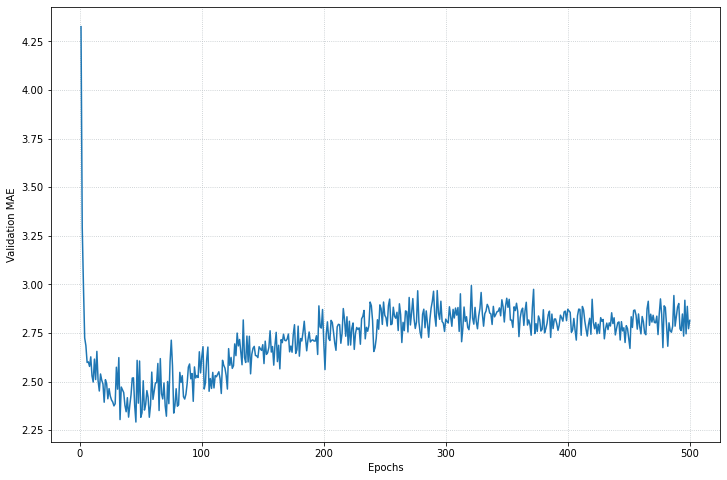

In [18]:
plot_per_epoch_mae(val_mean_absolute_error, epochs = 500)

## Exercise 9: Another plot, more lisible

In [19]:
def exp_moving_avg(points, factor):
  results = np.zeros(len(points))
  results[0] = points[0]

  for i in range(1, len(points)): 
    results[i] = (results[i-1] * factor) + (points[i] * (1 - factor))
    
  return results

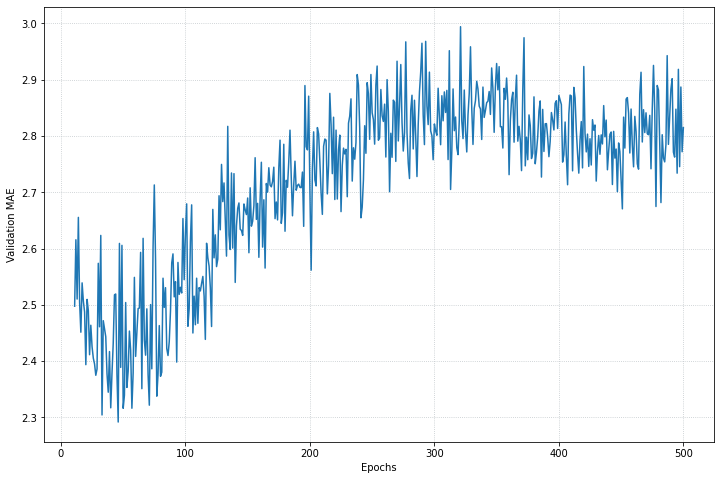

In [20]:
# Before replacing points using an exponential moving average
plot_per_epoch_mae(val_mean_absolute_error, epochs = 500, omit = 10)

In [21]:
exp_val_mean_absolute_error = exp_moving_avg(val_mean_absolute_error, factor=0.85)

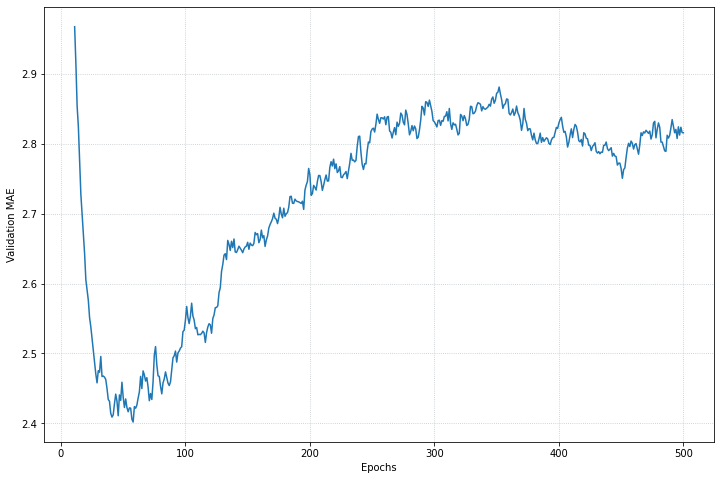

In [22]:
plot_per_epoch_mae(exp_val_mean_absolute_error, epochs = 500, omit = 10)

## Exercise 10: Tuning parameters of the model

In [23]:
hidden_layer_units = 2 ** np.arange(3, 8)
scores = []

for i in hidden_layer_units:
  print(f'Number of units per hidden layers: {i}')
  print(f'-'*25)

  all_scores, mae_history = cross_validation(x_train, y_train, k = 4, epochs = 100, units_per_hidden_layers = i, verbose=0)
  scores.append(all_scores.mean())


Number of units per hidden layers: 8
-------------------------
Processing fold #1/4
Time: 55s - MAE value: 2.2324
Processing fold #2/4
Time: 54s - MAE value: 2.6618
Processing fold #3/4
Time: 56s - MAE value: 2.7494
Processing fold #4/4
Time: 53s - MAE value: 2.8024
Number of units per hidden layers: 16
-------------------------
Processing fold #1/4
Time: 55s - MAE value: 1.8588
Processing fold #2/4
Time: 57s - MAE value: 2.473
Processing fold #3/4
Time: 62s - MAE value: 2.7503
Processing fold #4/4
Time: 65s - MAE value: 2.5578
Number of units per hidden layers: 32
-------------------------
Processing fold #1/4
Time: 62s - MAE value: 1.7308
Processing fold #2/4
Time: 59s - MAE value: 2.4012
Processing fold #3/4
Time: 57s - MAE value: 2.7718
Processing fold #4/4
Time: 53s - MAE value: 2.5692
Number of units per hidden layers: 64
-------------------------
Processing fold #1/4
Time: 55s - MAE value: 2.1106
Processing fold #2/4
Time: 56s - MAE value: 2.651
Processing fold #3/4
Time: 60s - 

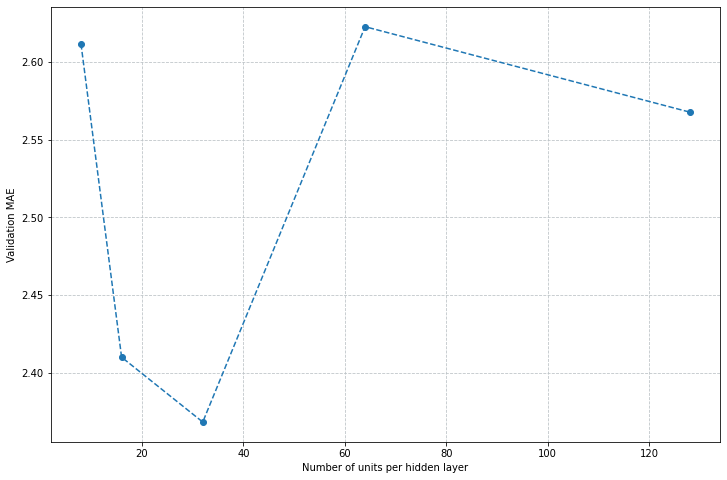

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(hidden_layer_units, scores, linestyle='dashed', marker='o')
plt.xlabel('Number of units per hidden layer')
plt.ylabel('Validation MAE')
plt.grid(b=True, which='major', color='#bdc3c7', linestyle='--')
plt.show()

In [28]:
final_model = build_model(32)

In [29]:
final_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 550.7700 - mae: 21.6725
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 507.8319 - mae: 20.7077
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 463.1447 - mae: 19.6640
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 413.3484 - mae: 18.4297
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 359.2766 - mae: 16.9744
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 302.7018 - mae: 15.2977
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 244.9241 - mae: 13.4392
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 190.2303 - mae: 11.4027
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 143.3972 - mae: 9.4192
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 106.6631 - mae: 7.7816
Epoch 11/100
13/13 [===========

13/13 [==============================] - 0s 1ms/step - loss: 8.4082 - mae: 2.0949
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 8.4155 - mae: 2.0616
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 8.3387 - mae: 2.0905
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 8.2207 - mae: 2.0564
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 8.2789 - mae: 2.0733
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 8.1526 - mae: 2.0544
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 8.1320 - mae: 2.0386
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 8.0263 - mae: 2.0501
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 7.9851 - mae: 2.0489
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 7.9896 - mae: 2.0282
Epoch 96/100
13/13 [==============================] - 0s 1ms/st

In [30]:
# testing the model with the training data
val_mse, val_mae = final_model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {val_mse} - MAE: {val_mae}')

MSE: 17.482513427734375 - MAE: 2.748940944671631


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62eda4a8-d26a-4a56-8c6c-5473bb99037f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>